# STDS22-Assignment 3
## Simulated Annealing for Travelling Salesman Problem
### Lev Svalov, DS-02, l.svalov@innopolis.university

## Data
I've borrowed the dataset of russian cities from [this repo](https://github.com/hflabs/city).

In [1]:
import pandas as pd
df = pd.read_csv("city.csv").sort_values(by="population", ascending=False)
cities = [{'city': c['address'], 'coordinates': (c['geo_lat'], c['geo_lon'])}
          for _,c in df[["address", "geo_lat", "geo_lon"]].head(30).iterrows()]
cities

[{'city': 'г Москва', 'coordinates': (55.7540471, 37.620405)},
 {'city': 'г Санкт-Петербург', 'coordinates': (59.9391313, 30.3159004)},
 {'city': 'г Новосибирск', 'coordinates': (55.028191, 82.9211489)},
 {'city': 'г Екатеринбург', 'coordinates': (56.8385216, 60.6054911)},
 {'city': 'г Нижний Новгород', 'coordinates': (56.3240627, 44.0053913)},
 {'city': 'г Казань', 'coordinates': (55.7943584, 49.1114975)},
 {'city': 'г Самара', 'coordinates': (53.1950306, 50.1069518)},
 {'city': 'г Омск', 'coordinates': (54.9848566, 73.3674517)},
 {'city': 'г Челябинск', 'coordinates': (55.1602624, 61.4008078)},
 {'city': 'г Ростов-на-Дону', 'coordinates': (47.2224566, 39.718803)},
 {'city': 'г Уфа', 'coordinates': (54.734944, 55.9578468)},
 {'city': 'г Волгоград', 'coordinates': (48.7070042, 44.5170339)},
 {'city': 'г Пермь', 'coordinates': (58.0102583, 56.2342034)},
 {'city': 'г Красноярск', 'coordinates': (56.0093879, 92.8524806)},
 {'city': 'г Воронеж', 'coordinates': (51.6593332, 39.1969229)},
 {

## Simulated Annealing

I'm gonna track the speed of convergence for
three different values of the annealing rate: 
* Slow cooling - small value for annealing rate
* Average cooling - middle value for annealing rate
* Fast cooling - big value for annealing rate


I selected `1000` as the good average value of initial tempreture `T` just by try-and-see scientific method ;)

In [2]:
from sa import SimulatedAnnealing
from time import time

tracked_time = []
ars = []
distances = []
T = 1000

### Slow Cooling

In [3]:
rate = 0.01
algo = SimulatedAnnealing(cities, rate, T)
time_start = time()
solution = algo.anneal()
time_finish = time()
consumed_time = time_finish - time_start
distance = algo.calculate_distance(solution[-1])
print(f'The simulated annealing with slow cooling(rate={rate}) has the following results:\n')
print(f'Time of convergence: {consumed_time}')
print(f'Total distance: {distance}')
print('Final sequence of cities:')
for i, c in enumerate(solution[-1]):
    print(f"\t{str(i+1)}. {c['city']}")
print(f"\t{str(i+2)}. {solution[-1][0]['city']}")


tracked_time.append(consumed_time)
ars.append(rate)
distances.append(distance)

The simulated annealing with slow cooling(rate=0.01) has the following results:

Time of convergence: 0.051833152770996094
Total distance: 70337.813629461
Final sequence of cities:
	1. г Владивосток
	2. г Волгоград
	3. г Казань
	4. г Пермь
	5. г Нижний Новгород
	6. г Красноярск
	7. г Кемерово
	8. г Москва
	9. г Новосибирск
	10. г Челябинск
	11. г Саратов
	12. г Махачкала
	13. г Уфа
	14. г Ростов-на-Дону
	15. г Самара
	16. г Хабаровск
	17. г Екатеринбург
	18. г Ижевск
	19. г Санкт-Петербург
	20. г Иркутск
	21. г Оренбург
	22. г Тюмень
	23. г Ульяновск
	24. Самарская обл, г Тольятти
	25. г Барнаул
	26. г Ярославль
	27. Кемеровская область - Кузбасс, г Новокузнецк
	28. г Воронеж
	29. г Омск
	30. г Краснодар
	31. г Владивосток


### Average Cooling

In [4]:
rate = 0.5
algo = SimulatedAnnealing(cities, rate, T)
time_start = time()
solution = algo.anneal()
time_finish = time()
consumed_time = time_finish - time_start
distance = algo.calculate_distance(solution[-1])
print(f'The simulated annealing with average cooling(rate={rate}) has the following results:\n')
print(f'Time of convergence: {consumed_time}')
print(f'Total distance: {distance}')
print('Final sequence of cities:')
for i, c in enumerate(solution[-1]):
    print(f"\t{str(i+1)}. {c['city']}")
print(f"\t{str(i+2)}. {solution[-1][0]['city']}")


tracked_time.append(consumed_time)
ars.append(rate)
distances.append(distance)

The simulated annealing with average cooling(rate=0.5) has the following results:

Time of convergence: 0.0029020309448242188
Total distance: 60923.26474614391
Final sequence of cities:
	1. г Пермь
	2. г Казань
	3. г Владивосток
	4. г Уфа
	5. г Кемерово
	6. г Барнаул
	7. г Челябинск
	8. г Хабаровск
	9. г Нижний Новгород
	10. г Ижевск
	11. г Москва
	12. г Оренбург
	13. г Ульяновск
	14. г Тюмень
	15. г Ярославль
	16. г Краснодар
	17. Кемеровская область - Кузбасс, г Новокузнецк
	18. г Омск
	19. г Екатеринбург
	20. г Иркутск
	21. г Ростов-на-Дону
	22. г Воронеж
	23. г Санкт-Петербург
	24. г Волгоград
	25. г Махачкала
	26. Самарская обл, г Тольятти
	27. г Новосибирск
	28. г Саратов
	29. г Самара
	30. г Красноярск
	31. г Пермь


### Fast Cooling

In [5]:
rate = 0.99
algo = SimulatedAnnealing(cities, rate, T)
time_start = time()
solution = algo.anneal()
time_finish = time()
consumed_time = time_finish - time_start
distance = algo.calculate_distance(solution[-1])
print(f'The simulated annealing with fast cooling(rate={rate}) has the following results:\n')
print(f'Time of convergence: {consumed_time}')
print(f'Total distance: {distance}')
print('Final sequence of cities:')
for i, c in enumerate(solution[-1]):
    print(f"\t{str(i+1)}. {c['city']}")
print(f"\t{str(i+2)}. {solution[-1][0]['city']}")


tracked_time.append(consumed_time)
ars.append(rate)
distances.append(distance)

The simulated annealing with fast cooling(rate=0.99) has the following results:

Time of convergence: 0.0004189014434814453
Total distance: 60369.39325265539
Final sequence of cities:
	1. г Владивосток
	2. г Челябинск
	3. г Ижевск
	4. г Казань
	5. г Кемерово
	6. г Оренбург
	7. г Ульяновск
	8. г Хабаровск
	9. г Иркутск
	10. г Москва
	11. г Новосибирск
	12. г Екатеринбург
	13. г Санкт-Петербург
	14. г Волгоград
	15. г Махачкала
	16. г Воронеж
	17. г Барнаул
	18. г Пермь
	19. Кемеровская область - Кузбасс, г Новокузнецк
	20. г Ростов-на-Дону
	21. г Красноярск
	22. г Омск
	23. г Тюмень
	24. г Саратов
	25. г Самара
	26. г Уфа
	27. г Краснодар
	28. г Ярославль
	29. Самарская обл, г Тольятти
	30. г Нижний Новгород
	31. г Владивосток


### Graphs

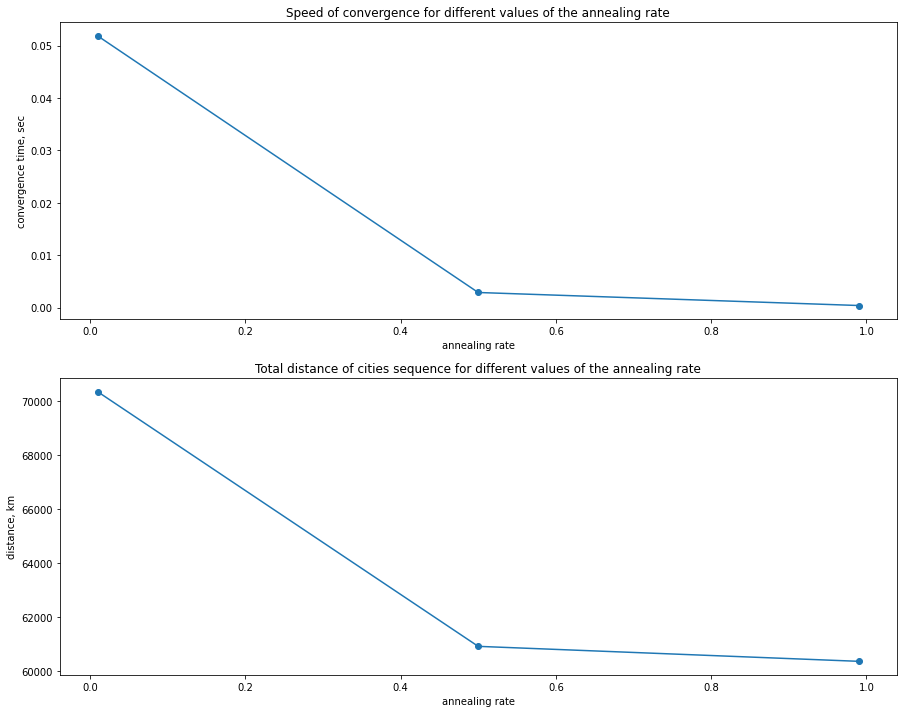

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 12)

fig, (ax1, ax2) = plt.subplots(2)

ax1.set_title('Speed of convergence for different values of the annealing rate')
ax1.set(xlabel='annealing rate', ylabel='convergence time, sec')
ax1.plot(ars, tracked_time, marker="o")

ax2.set_title('Total distance of cities sequence for different values of the annealing rate')
ax2.set(xlabel='annealing rate', ylabel='distance, km')
ax2.plot(ars, distances, marker="o")

## Visualization of optimization process

In [7]:
from matplotlib import animation
rate = 0.5
T=1000
algo = SimulatedAnnealing(cities, rate, T)
solution = algo.anneal()

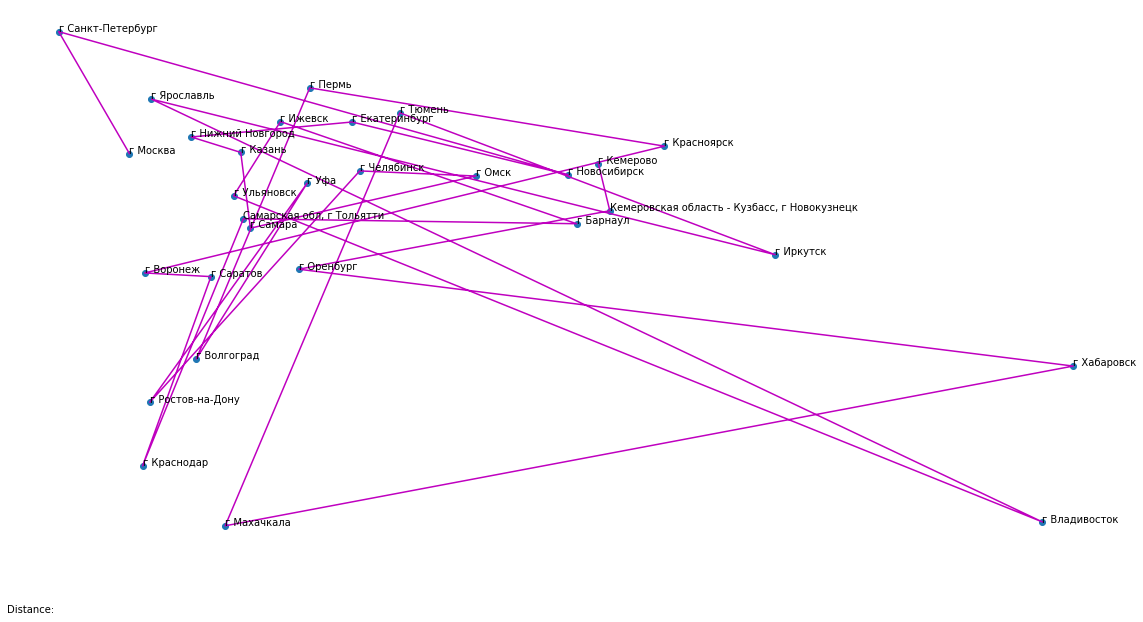

MovieWriter ffmpeg unavailable; using Pillow instead.


In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
coordinates = [c['coordinates'] for c in cities]
xs, ys = tuple(map(list, zip(*coordinates)))
ax.scatter(ys, xs)
for c in cities:
    ax.annotate(c['city'], xy=(c['coordinates'][1],c['coordinates'][0]))

line = ax.plot(ys, xs, color='m')[0]
dist = ax.text(25, 40, 'Distance:')
def init():
    line.set_data([], [])
    dist.set_text('')
    return line, dist

def animate(j):
    state = solution[j]
    coordinates = [c['coordinates'] for c in state]
    ys, xs = tuple(map(list, zip(*coordinates)))
    line.set_data(xs, ys)
    dist.set_text(f'Distance: {algo.calculate_distance(state)} km')
    return line, dist


anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(solution)-1, interval=20, repeat=False)
plt.axis('off')
plt.show()
anim.save('animation.gif')